In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('trainset.csv')


In [3]:
df_test = pd.read_csv('testset.csv')


In [31]:
df_train.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,652.704082,657.475653,647.433700,652.657015,652.657015,2.414928e+06
std,175.630574,176.627416,174.732814,175.820993,175.820993,1.672160e+06
min,350.053253,350.391052,345.512787,349.164032,349.164032,7.900000e+03
25%,528.287079,532.615204,524.232483,528.429413,528.429413,1.336900e+06
50%,600.002563,603.236511,594.453674,598.005554,598.005554,1.842300e+06
75%,774.015015,779.120025,768.662506,772.720001,772.720001,3.090850e+06
max,1075.199951,1078.489990,1063.550049,1077.140015,1077.140015,2.328310e+07


In [4]:
df_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [5]:
trainset = df_train.iloc[:,1:2].values
trainset

array([[ 357.385559],
       [ 360.122742],
       [ 362.313507],
       ...,
       [1057.390015],
       [1051.599976],
       [1046.719971]])

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(trainset)
training_scaled

array([[0.01011148],
       [0.01388614],
       [0.01690727],
       ...,
       [0.97543954],
       [0.9674549 ],
       [0.96072522]])

In [7]:
x_train = []
y_train = []
for i in range(60,1259):
    x_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)
x_train.shape

(1199, 60)

In [8]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

2024-04-10 12:58:46.348300: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-10 12:58:46.348547: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-10 12:58:46.350531: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-10 12:58:46.374462: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-10 12:58:46.934468: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [10]:
regressor = Sequential()
regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))

2024-04-10 12:58:47.175515: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_COMPAT_NOT_SUPPORTED_ON_DEVICE: forward compatibility was attempted on non supported HW
2024-04-10 12:58:47.175538: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:134] retrieving CUDA diagnostic information for host: dypcoeadmin-MS-7D48
2024-04-10 12:58:47.175541: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:141] hostname: dypcoeadmin-MS-7D48
2024-04-10 12:58:47.175621: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:165] libcuda reported version is: 535.161.7
2024-04-10 12:58:47.175630: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:169] kernel reported version is: 535.154.5
2024-04-10 12:58:47.175632: E external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:251] kernel version 535.154.5 does not match DSO version 535.161.7 -- cannot find working devices in this configuratio

In [11]:
regressor.add(Dropout(0.2))

In [12]:
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

In [13]:
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

In [14]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [15]:
regressor.add(Dense(units = 1))

In [16]:
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [17]:
regressor.fit(x_train,y_train,epochs = 100, batch_size = 32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0747
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0046
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0041
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0036
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0035
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0033
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0031
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0036
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0031
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0033
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0033
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0028
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0032
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0027
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - lo

In [32]:
regressor.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 213,155 (832.64 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 142,104 (555.10 KB)

In [18]:
real_stock_price = df_test.iloc[:,1:2].values

In [19]:
dataset_total = pd.concat((df_train['Open'],df_test['Open']),axis = 0)
dataset_total

0       357.385559
1       360.122742
2       362.313507
3       365.348755
4       365.393463
          ...     
120    1143.599976
121    1128.000000
122    1121.339966
123    1102.089966
124    1120.000000
Name: Open, Length: 1384, dtype: float64

In [20]:
inputs = dataset_total[len(dataset_total) - len(df_test)-60:].values
inputs

array([ 955.48999 ,  966.700012,  980.      ,  980.      ,  973.719971,
        987.450012,  992.      ,  992.099976,  990.289978,  991.77002 ,
        986.      ,  989.440002,  989.52002 ,  970.      ,  968.369995,
        980.      , 1009.190002, 1014.      , 1015.219971, 1017.210022,
       1021.76001 , 1022.109985, 1028.98999 , 1027.27002 , 1030.52002 ,
       1033.98999 , 1026.459961, 1023.419983, 1022.590027, 1019.210022,
       1022.52002 , 1034.01001 , 1020.26001 , 1023.309998, 1035.      ,
       1035.869995, 1040.      , 1055.089966, 1042.680054, 1022.369995,
       1015.799988, 1012.659973,  995.940002, 1001.5     , 1020.429993,
       1037.48999 , 1035.5     , 1039.630005, 1046.119995, 1045.      ,
       1054.609985, 1066.079956, 1075.199951, 1071.780029, 1064.949951,
       1061.109985, 1058.069946, 1057.390015, 1051.599976, 1046.719971,
       1048.339966, 1064.310059, 1088.      , 1094.      , 1102.22998 ,
       1109.400024, 1097.099976, 1106.300049, 1102.410034, 1132.

In [21]:
inputs = inputs.reshape(-1,1)
inputs

array([[ 955.48999 ],
       [ 966.700012],
       [ 980.      ],
       [ 980.      ],
       [ 973.719971],
       [ 987.450012],
       [ 992.      ],
       [ 992.099976],
       [ 990.289978],
       [ 991.77002 ],
       [ 986.      ],
       [ 989.440002],
       [ 989.52002 ],
       [ 970.      ],
       [ 968.369995],
       [ 980.      ],
       [1009.190002],
       [1014.      ],
       [1015.219971],
       [1017.210022],
       [1021.76001 ],
       [1022.109985],
       [1028.98999 ],
       [1027.27002 ],
       [1030.52002 ],
       [1033.98999 ],
       [1026.459961],
       [1023.419983],
       [1022.590027],
       [1019.210022],
       [1022.52002 ],
       [1034.01001 ],
       [1020.26001 ],
       [1023.309998],
       [1035.      ],
       [1035.869995],
       [1040.      ],
       [1055.089966],
       [1042.680054],
       [1022.369995],
       [1015.799988],
       [1012.659973],
       [ 995.940002],
       [1001.5     ],
       [1020.429993],
       [10

In [22]:
inputs = sc.transform(inputs)
inputs.shape

(185, 1)

In [23]:
x_test = []
for i in range(60,185):
    x_test.append(inputs[i-60:i,0])

In [24]:
x_test = np.array(x_test)
x_test.shape

(125, 60)

In [25]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(125, 60, 1)

In [26]:
predicted_price = regressor.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


In [27]:
predicted_price = sc.inverse_transform(predicted_price)
predicted_price

array([[1056.6317],
       [1054.9633],
       [1056.6799],
       [1064.2101],
       [1075.0002],
       [1085.8414],
       [1094.7731],
       [1098.6516],
       [1099.6055],
       [1098.9059],
       [1102.2667],
       [1107.8998],
       [1113.958 ],
       [1118.7942],
       [1122.6328],
       [1128.714 ],
       [1138.3364],
       [1147.5393],
       [1154.1129],
       [1157.831 ],
       [1158.2001],
       [1157.2203],
       [1155.301 ],
       [1147.7683],
       [1133.3495],
       [1109.1501],
       [1090.7795],
       [1080.2473],
       [1071.0422],
       [1066.4613],
       [1065.9323],
       [1067.8464],
       [1074.257 ],
       [1083.5225],
       [1091.9424],
       [1099.2198],
       [1105.5825],
       [1109.5491],
       [1113.1318],
       [1118.3018],
       [1121.1703],
       [1119.1034],
       [1106.5476],
       [1092.4515],
       [1086.3755],
       [1087.26  ],
       [1095.1025],
       [1108.221 ],
       [1125.139 ],
       [1141.0153],


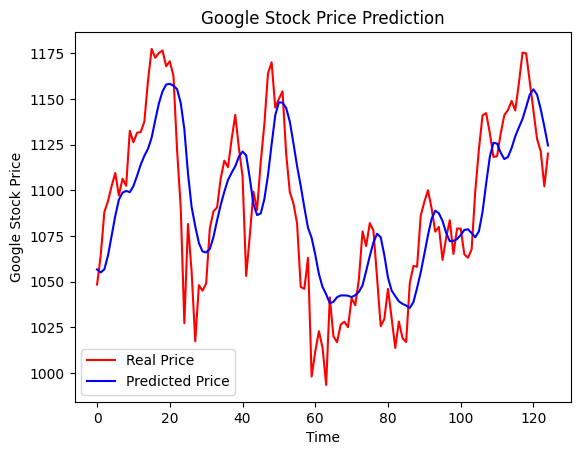

In [28]:
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()